In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
a = 282e-12
q = 1.602e-19
k = 8.9875517923e9

K = k * q * q

In [90]:
ex = np.array([1, 0, 0])
ey = np.array([0, 1, 0])
ez = np.array([0, 0, 1])

order = 1
n = 2 * order + 1

Cl = []
Na = []

for i in range(-order, order+1):
      for j in range(-order, order+1):
          for k in range(-order, order+1):
                if ((i+j+k)%2 == 0):
                    Na.append(a * (i * ex + j * ey + k * ez))
                else:
                    Cl.append(a * (i * ex + j * ey + k * ez))

Na.pop(n * n * n // 4)

array([0., 0., 0.])

In [91]:
def F(x, xq):
    dx = x - xq
    r2 = dx.dot(dx)
    return K * (x - xq)/math.pow(r2, 1.5)

In [92]:
def fres(x):
    Fres = np.zeros(3)

    for xq in Cl:
        Fres = Fres - F(x, xq)

    for xq in Na:
        Fres = Fres + F(x, xq)

    return Fres

fres(np.array([0, 0, 0]))

array([-1.39909846e-24, -2.30382725e-24,  4.57211159e-25])

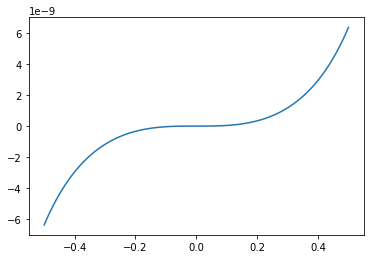

In [93]:
x = np.linspace(-a/2, a/2, 100)
y = np.zeros(100)

for i in range(100):
    y[i] = fres(np.array([x[i], 0, 0]))[0]

fig, ax = plt.subplots()
pltx = ax.plot(x/a, y)

# Further Reading

[Bonding in crystalline solids](https://opentextbc.ca/universityphysicsv3openstax/chapter/bonding-in-crystalline-solids/)